# 1.0 Um problema de classificação de ponta-a-ponta usando NLP



## 1.1 Dataset description

O dataset contém informações gerais de 5.000 processos julgados
nos Juizados Especiais Federais dentro das Seções Judiciárias do Tribunal Regional Federal da 5a Região (https://www.trf5.jus.br). Os dados são oriundos da raspagem da consulta pública processual. Além disso, ele possui 46 colunas, das quais duas possuem texto livre:
"conteudo_sentenca" e "conteudo_acordao".

O dataset pode ser baixado no link a seguir: https://jacob.al/dataset_juizados 

Ao longo dos notebooks, vão ser realizados os seguintes passos:

1. Importação do dataset **(concluído)**
2. Análise exploratória dos dados
3. Pré-processamento
4. Verificação dos dados
5. Segregação dos dados
6. Treinamento
7. Teste

<center><img width="600" src="https://drive.google.com/uc?export=view&id=1fKGuR5U5ECf7On6Zo1UWzAIWZrMmZnGc"></center>


## 1.2 Instalação e importação das bibliotecas

In [ ]:
!pip install pandas-profiling==3.1.0

In [ ]:
!pip install wandb

In [ ]:
import wandb
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import tempfile
import os
import warnings

In [ ]:
%matplotlib inline
warnings.filterwarnings('ignore')

## 1.3 Análise exploratória dos dados

### 1.3.1 Login no wandb


In [ ]:
# Login no Weights & Biases
!wandb login --relogin

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit: 
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


### 1.3.2 Download  do artefato raw_data do Wandb

In [ ]:
# Salvando todas as mudanças de código do notebook e sincronizando com o Wandb
run = wandb.init(project="nlp_bolsa", save_code=True)

wandb: Currently logged in as: morsinaldo. Use `wandb login --relogin` to force relogin


In [ ]:
# donwload the latest version of artifact raw_data.csv
artifact = run.use_artifact("nlp_bolsa/raw_data.csv:latest")

# create a dataframe from the artifact
df = pd.read_csv(artifact.file())

In [ ]:
df.head()

num_processo     data_ajuizamento  \
0  0500454-62.2017.4.05.8402  2017-03-06 00:00:00   
1  0517700-16.2013.4.05.8013  2013-10-09 00:00:00   
2  0502388-07.2007.4.05.8305  2007-07-13 00:00:00   
3  0503551-02.2014.4.05.8103  2014-04-02 00:00:00   
4  0503488-94.2016.4.05.8300  2016-03-21 00:00:00   

  data_primeira_movimentacao_processual data_ultima_movimentacao  \
0                   2017-03-06 11:01:00      2017-10-30 10:07:00   
1                   2013-10-09 20:54:00                      NaN   
2                   2007-07-13 13:51:00                      NaN   
3                   2014-04-02 11:02:00                      NaN   
4                   2016-03-21 11:04:00      2019-02-19 13:16:00   

                                               autor  \
0  Lourival Francisco da Silva (027.173.384-54)\n...   
1  MARIA LUCIA CARDOSO (382.242.084-00)\nEmanuel ...   
2  QUITÉRIA BARBOSA DA SILVA NASCIMENTO (062.819....   
3  Emanuela Carneiro Tabosa (777.839.723-49)\nBru...   
4  Lúcio Flavio de Lima Albuquerque (095.403.004-...   

                                                 reu tutela_antecipada   vara  \
0  Fazenda Nacional (00.394.460/0239-40)\nMunicíp...                 N   9-RN   
1       Caixa Econômica Federal (00.360.305/0001-04)                 N   9-AL   
2  Instituto Nacional do Seguro Social - INSS (29...                 N  23-PE   
3  UNIÃO (FAZENDA NACIONAL) - Procuradoria da Faz...                 N  19-CE   
4  ANGELA MARIA DO NASCIMENTO SILVA (157.771.544-...                 N  19-PE   

  titular_substituto                            classe_atual  ...  \
0            Titular             Execução de Título Judicial  ...   
1            Titular  Procedimento do Juizado Especial Cível  ...   
2            Titular  Procedimento do Juizado Especial Cível  ...   
3            Titular  Procedimento do Juizado Especial Cível  ...   
4         Substituto  Procedimento do Juizado Especial Cível  ...   

     resultado_1_grau                                  conteudo_sentenca  \
0          PROCEDENTE  SENTENÇA 1. Relatório Cuida-se de ação propost...   
1  EXTINTO SEM MÉRITO  SENTENÇA Trata-se de ação especial cível, em c...   
2  EXTINTO SEM MÉRITO  SENTENÇA Vistos etc. Trata-se de ação especial...   
3          PROCEDENTE  SENTENÇA I - RELATÓRIO Cuida-se de ação em que...   
4        IMPROCEDENTE  SENTENÇA Tipo A I – RELATÓRIO Dispensado o rel...   

  n_dias_ate_sentenca n_tokens_sentenca             relator_acordao  \
0           76.307593              1309  Almiro José da Rocha Lemos   
1           20.844491               263                         NaN   
2          143.822245               956                         NaN   
3           21.360567              3037     CÍNTIA MENEZES BRUNETTA   
4          784.066493              2099       Joaquim Lustosa Filho   

        data_sessao_tr         data_acordao  \
0  2017-08-09 09:00:00  2017-08-14 10:46:34   
1                  NaN                  NaN   
2                  NaN                  NaN   
3  2014-06-25 13:30:00  2014-06-27 16:14:43   
4  2018-06-19 10:00:00  2018-06-19 15:01:56   

                                    conteudo_acordao resultado_2_grau  \
0  PROCESSO 0500454-62.2017.4.05.8402  EMENTA:DIR...   NÃO PROVIMENTO   
1                                                NaN              NaN   
2                                                NaN              NaN   
3  VOTO Relatório dispensado, nos termos do art. ...   NÃO PROVIMENTO   
4  EMENTA PREVIDENCIÁRIO. PENSÃO POR MORTE. PROVA...   NÃO PROVIMENTO   

  n_tokens_acordao  
0            381.0  
1              0.1  
2              0.1  
3           1214.0  
4           1962.0  

[5 rows x 46 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 46 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   num_processo                           5000 non-null   object 
 1   data_ajuizamento                       5000 non-null   object 
 2   data_primeira_movimentacao_processual  5000 non-null   object 
 3   data_ultima_movimentacao               3362 non-null   object 
 4   autor                                  5000 non-null   object 
 5   reu                                    5000 non-null   object 
 6   tutela_antecipada                      5000 non-null   object 
 7   vara                                   5000 non-null   object 
 8   titular_substituto                     5000 non-null   object 
 9   classe_atual                           5000 non-null   object 
 10  codigo_assunto_cnj                     5000 non-null   int64  
 11  assu

### 1.3.3 Pandas Profilling

In [ ]:
ProfileReport(df, title="Pandas Profiling Report", explorative=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### 1.3.4 EDA Manual

In [ ]:
# Verificando as linhas duplicadas
df.duplicated().sum()

0

#### 1.3.4.1 Colunas 0 a 9

In [ ]:
df.iloc[:, 0:10]

num_processo     data_ajuizamento  \
0     0500454-62.2017.4.05.8402  2017-03-06 00:00:00   
1     0517700-16.2013.4.05.8013  2013-10-09 00:00:00   
2     0502388-07.2007.4.05.8305  2007-07-13 00:00:00   
3     0503551-02.2014.4.05.8103  2014-04-02 00:00:00   
4     0503488-94.2016.4.05.8300  2016-03-21 00:00:00   
...                         ...                  ...   
4995  0521292-29.2017.4.05.8013  2017-08-03 00:00:00   
4996  0507577-96.2007.4.05.8100  2007-06-20 00:00:00   
4997  0502491-74.2017.4.05.8107  2017-07-21 00:00:00   
4998  0503636-28.2018.4.05.8400  2018-03-12 00:00:00   
4999  0510095-29.2007.4.05.8013  2007-06-02 00:00:00   

     data_primeira_movimentacao_processual data_ultima_movimentacao  \
0                      2017-03-06 11:01:00      2017-10-30 10:07:00   
1                      2013-10-09 20:54:00                      NaN   
2                      2007-07-13 13:51:00                      NaN   
3                      2014-04-02 11:02:00                      NaN   
4                      2016-03-21 11:04:00      2019-02-19 13:16:00   
...                                    ...                      ...   
4995                   2017-08-03 16:17:00      2017-08-29 11:55:00   
4996                   2007-06-20 19:52:00                      NaN   
4997                   2017-07-21 09:21:00      2018-10-23 16:35:00   
4998                   2018-03-12 15:23:00      2018-06-21 15:54:00   
4999                   2007-06-04 07:43:00                      NaN   

                                                  autor  \
0     Lourival Francisco da Silva (027.173.384-54)\n...   
1     MARIA LUCIA CARDOSO (382.242.084-00)\nEmanuel ...   
2     QUITÉRIA BARBOSA DA SILVA NASCIMENTO (062.819....   
3     Emanuela Carneiro Tabosa (777.839.723-49)\nBru...   
4     Lúcio Flavio de Lima Albuquerque (095.403.004-...   
...                                                 ...   
4995  VALDEMILSON DE OLIVEIRA (063.396.914-12)\nClér...   
4996  Regina Lucia da Silva. (377.252.893-72)\nDefen...   
4997  FRANCISCA ELIZANGELA DE QUEIROZ (042.471.503-1...   
4998  MARIZETE CARLOS FERNANDES DA SILVA (481.584.53...   
4999  JULIANNE BINA MALAFAIA PEREIRA DA SILVA (054.8...   

                                                    reu tutela_antecipada  \
0     Fazenda Nacional (00.394.460/0239-40)\nMunicíp...                 N   
1          Caixa Econômica Federal (00.360.305/0001-04)                 N   
2     Instituto Nacional do Seguro Social - INSS (29...                 N   
3     UNIÃO (FAZENDA NACIONAL) - Procuradoria da Faz...                 N   
4     ANGELA MARIA DO NASCIMENTO SILVA (157.771.544-...                 N   
...                                                 ...               ...   
4995  INSS - Instituto Nacional do Seguro Social (29...                 N   
4996   Caixa Econômica Federal CEF (00.360.305/0001-04)                 N   
4997  INSS - AADJ - APS em Juazeiro do Norte (77.923...                 N   
4998  AGÊNCIA DE ATENDIMENTO DE DEMANDAS JUDICIAIS (...                 S   
4999       Caixa Econômica Federal (00.360.305/0001-04)                 N   

       vara titular_substituto                            classe_atual  
0      9-RN            Titular             Execução de Título Judicial  
1      9-AL            Titular  Procedimento do Juizado Especial Cível  
2     23-PE            Titular  Procedimento do Juizado Especial Cível  
3     19-CE            Titular  Procedimento do Juizado Especial Cível  
4     19-PE         Substituto  Procedimento do Juizado Especial Cível  
...     ...                ...                                     ...  
4995   6-AL         Substituto  Procedimento do Juizado Especial Cível  
4996  21-CE         Substituto  Procedimento do Juizado Especial Cível  
4997  25-CE         Substituto  Procedimento do Juizado Especial Cível  
4998   7-RN         Substituto  Procedimento do Juizado Especial Cível  
4999   6-AL            Titular  Procedimento do Juizado 

In [ ]:
df['classe_atual'].value_counts()

Procedimento do Juizado Especial Cível    4269
Execução de Título Judicial                654
Processo de Execução                        46
Petição                                     30
Procedimento de Conhecimento                 1
Name: classe_atual, dtype: int64

  - `Número do processo` é uma coluna que não interessa ao treinamento, pois não adicionar nenhuma informação relevante, sendo assim apenas um identificador.

#### 1.3.4.2 Colunas 10 a 19

In [ ]:
df.iloc[:, 10:20]

codigo_assunto_cnj                                        assunto_cnj  \
0                   6048                                 Direito Tributário   
1                  10433                                      Direito Civil   
2                   6138                             Direito Previdenciário   
3                   6048                                 Direito Tributário   
4                   6179                             Direito Previdenciário   
...                  ...                                                ...   
4995                6101                             Direito Previdenciário   
4996                 899                                      Direito Civil   
4997                6101                             Direito Previdenciário   
4998                6101                             Direito Previdenciário   
4999               10174  Direito Administrativo e outras matérias do Di...   

                                complemento_assunto_cnj  \
0                                         Contribuições   
1                                Responsabilidade Civil   
2     RMI - Renda Mensal Inicial, Reajustes e Revisõ...   
3                                         Contribuições   
4     Pedidos Genéricos Relativos aos Benefícios em ...   
...                                                 ...   
4995                              Benefícios em Espécie   
4996                                                NaN   
4997                              Benefícios em Espécie   
4998                              Benefícios em Espécie   
4999  Organização Político-administrativa / Administ...   

                   detalhe_assunto_cnj  num_advogados advogado_1  \
0        Contribuições Previdenciárias              1   RN008392   
1           Indenização por Dano Moral              1   AL002019   
2     Reajustes e Revisões Específicos              1   PE020418   
3        Contribuições Previdenciárias              2   CE019341   
4                            Conversão              1  PE020070D   
...                                ...            ...        ...   
4995     Auxílio-Doença Previdenciário              2   AL007145   
4996                               NaN              0     NENHUM   
4997     Auxílio-Doença Previdenciário              1   PB004007   
4998     Auxílio-Doença Previdenciário              2   RN005987   
4999          Instituições Financeiras              1   AL006265   

     juizado_itinerante medida_acautelatoria justica_gratuita  \
0                     N                    N                S   
1                     N                    N                S   
2                     N                    N                S   
3                     N                    N                S   
4                     N                    N                S   
...                 ...                  ...              ...   
4995                  N                    N                S   
4996                  N                    N                S   
4997                  N                    N                S   
4998                  N                    N                S   
4999                  N                    N                S   

     ministerio_publico  
0                     N  
1                     N  
2                     N  
3                     N  
4                     N  
...                 ...  
4995                  N  
4996                  N  
4997                  N  
4998                  N  
4999                  N  

[5000 rows x 10 columns]

In [ ]:
df['codigo_assunto_cnj'].value_counts()

6101     1330
6114      821
6096      464
6095      324
6103      247
         ... 
14          1
5979        1
5941        1
10381       1
5632        1
Name: codigo_assunto_cnj, Length: 115, dtype: int64

In [ ]:
df['assunto_cnj'].value_counts()

Direito Previdenciário                                         4059
Direito Administrativo e outras matérias do Direito Público     471
Direito do Consumidor                                           171
Direito Civil                                                   146
Direito Tributário                                              129
Direito Processual Civil e do Trabalho                           12
Direito do Trabalho                                              11
Direito Penal                                                     1
Name: assunto_cnj, dtype: int64

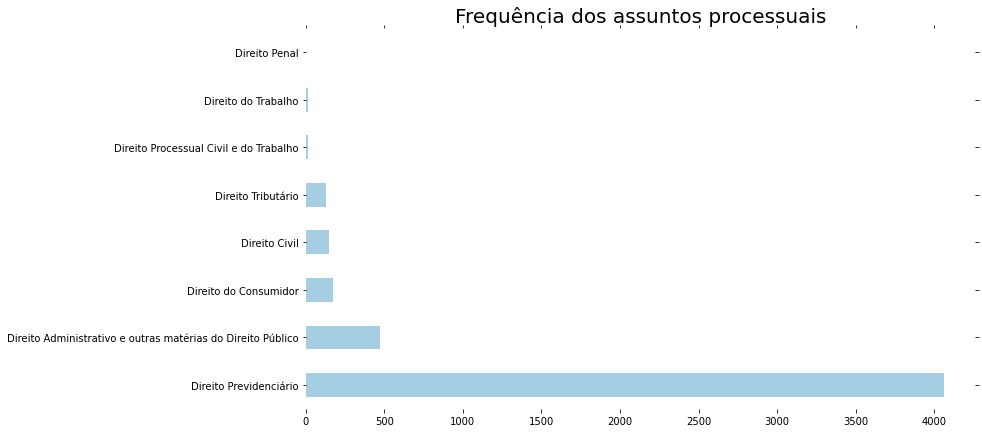

In [ ]:
assuntos_values = df['assunto_cnj'].value_counts()

fig, ax = plt.subplots(figsize=(12,7))
assuntos_values.plot(kind='barh', rot=0, colormap=plt.cm.Paired)

plt.title('Frequência dos assuntos processuais', size=20)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.tick_params(top="off", left="off", right="off", bottom='off')

In [ ]:
df['complemento_assunto_cnj'].value_counts()

Benefícios em Espécie                                           3617
Servidor Público Civil                                           275
RMI - Renda Mensal Inicial, Reajustes e Revisões Específicas     214
Pedidos Genéricos Relativos aos Benefícios em Espécie            199
Organização Político-administrativa / Administração Pública      132
Responsabilidade do Fornecedor                                   106
Contribuições                                                     85
Contratos de Consumo                                              62
Obrigações                                                        55
Responsabilidade Civil                                            48
Serviços                                                          26
Militar                                                           21
Tempo de serviço                                                  19
Impostos                                                          16
Crédito Tributário                

In [ ]:
pd.crosstab(df.complemento_assunto_cnj,[df.assunto_cnj],margins=True)

assunto_cnj                                         Direito Administrativo e outras matérias do Direito Público  \
complemento_assunto_cnj                                                                                           
Atos Administrativos                                                                                4             
Benefícios em Espécie                                                                               0             
Coisas                                                                                              0             
Concurso Público / Edital                                                                           2             
Contratos Administrativos                                                                           1             
Contratos de Consumo                                                                                0             
Contribuições                                                                                       0             
Crédito Tributário                                                                                  0             
Disposições Diversas Relativas às Prestações                                                        0             
Dívida Ativa                                                                                        0             
Empréstimos Compulsórios                                                                            0             
Fatos Jurídicos                                                                                     0             
Férias                                                                                              0             
Impostos                                                                                            0             
Limitações ao Poder de Tributar                                                                     0             
Liquidação / Cumprimento / Execução                                                                 0             
Meio Ambiente                                                                                       2             
Militar                                                                                            21             
Obrigação Tributária                                                                                0             
Obrigações                                                                                          0             
Organização Político-administrativa / Administr...                                                132             
Partes e Procuradores                                                                               0             
Pedidos Genéricos Relativos aos Benefícios em E...                                                  0             
Prescrição                                                                                          0             
Procedimentos Fiscais                                                                               0             
Processo e Procedimento                                                                             0             
RMI - Renda Mensal Inicial, Reajustes e Revisõe...                                                  0             
Remuneração, Verbas Indenizatórias e Benefícios                                                     0             
Rescisão do Contrato de Trabalho                                                                    0             
Responsabilidade Civil                                                                              0             
Responsabilidade Civil do Empregador                                                                0             
Responsabilidade da Administração                                                                   6             
Responsabilidade do Fornecedor                                                            

A partir da tabela acima é possível extrair muitas informações interessantes, como: 
1. A maioria das linhas cujo assunto é *Direito Previdenciário* envolvem *Benefícios em Espécie* como assunto complementar.
2. A maioria das linhas cujo assunto é *Direito Civil* possuem *Obrigações* como assunto complementar.
3. A maioria das linhas cujo assunto é *Direito do Trabalho* estão relacionadas com o pagamento de verbas, indenizações etc.
4. A maioria das linhas cujo assunto é *Direito Tributário* estão relacionadas com obrigações, impostos etc.

**Insight**: Dependendo da modelagem do problema, pode ser interessante diminuir a cardinalidade da coluna `complemento_assunto_cnj`

In [ ]:
pd.crosstab(df.detalhe_assunto_cnj,[df.assunto_cnj],margins=True)

assunto_cnj                                Direito Administrativo e outras matérias do Direito Público  \
detalhe_assunto_cnj                                                                                      
Adicional                                                                                  0             
Adimplemento e Extinção                                                                    0             
Antecipação de Tutela / Tutela Específica                                                  0             
Anulação e Correção de Provas / Questões                                                   1             
Aposentadoria Especial (Art. 57/8)                                                         0             
...                                                                                      ...             
Telefonia                                                                                  0             
Tempo de Serviço                                                                           1             
Transmissão                                                                                0             
Títulos de Crédito                                                                         0             
All                                                                                      467             

assunto_cnj                                Direito Civil  \
detalhe_assunto_cnj                                        
Adicional                                              0   
Adimplemento e Extinção                               12   
Antecipação de Tutela / Tutela Específica              0   
Anulação e Correção de Provas / Questões               0   
Aposentadoria Especial (Art. 57/8)                     0   
...                                                  ...   
Telefonia                                              0   
Tempo de Serviço                                       0   
Transmissão                                            2   
Títulos de Crédito                                     6   
All                                                  106   

assunto_cnj                                Direito Previdenciário  \
detalhe_assunto_cnj                                                 
Adicional                                                       0   
Adimplemento e Extinção                                         0   
Antecipação de Tutela / Tutela Específica                       0   
Anulação e Correção de Provas / Questões                        0   
Aposentadoria Especial (Art. 57/8)                             66   
...                                                           ...   
Telefonia                                                       0   
Tempo de Serviço                                                0   
Transmissão                                                     0   
Títulos de Crédito                                              0   
All                                                          4041   

assunto_cnj                                Direito Processual Civil e do Trabalho  \
detalhe_assunto_cnj                                                                 
Adicional                                                                       0   
Adimplemento e Extinção                                                         0   
Antecipação de Tutela / Tutela Específica                                       6   
Anulação e Correção de Provas / Questões                                        0   
Aposentadoria Especial (Art. 57/8)                                              0   
...                                                                           ...   
Telefonia                                                                       0   
Tempo de Serviço                                                                0   
Transmissão                                                                     0   
Títulos

In [ ]:
pd.crosstab(df.detalhe_assunto_cnj,[df.complemento_assunto_cnj],margins=True)

complemento_assunto_cnj                    Atos Administrativos  \
detalhe_assunto_cnj                                               
Adicional                                                     0   
Adimplemento e Extinção                                       0   
Antecipação de Tutela / Tutela Específica                     0   
Anulação e Correção de Provas / Questões                      0   
Aposentadoria Especial (Art. 57/8)                            0   
...                                                         ...   
Telefonia                                                     0   
Tempo de Serviço                                              0   
Transmissão                                                   0   
Títulos de Crédito                                            0   
All                                                           4   

complemento_assunto_cnj                    Benefícios em Espécie  Coisas  \
detalhe_assunto_cnj                                                        
Adicional                                                      0       0   
Adimplemento e Extinção                                        0       0   
Antecipação de Tutela / Tutela Específica                      0       0   
Anulação e Correção de Provas / Questões                       0       0   
Aposentadoria Especial (Art. 57/8)                            66       0   
...                                                          ...     ...   
Telefonia                                                      0       0   
Tempo de Serviço                                               0       0   
Transmissão                                                    0       0   
Títulos de Crédito                                             0       0   
All                                                         3612       2   

complemento_assunto_cnj                    Concurso Público / Edital  \
detalhe_assunto_cnj                                                    
Adicional                                                          0   
Adimplemento e Extinção                                            0   
Antecipação de Tutela / Tutela Específica                          0   
Anulação e Correção de Provas / Questões                           1   
Aposentadoria Especial (Art. 57/8)                                 0   
...                                                              ...   
Telefonia                                                          0   
Tempo de Serviço                                                   0   
Transmissão                                                        0   
Títulos de Crédito                                                 0   
All                                                                2   

complemento_assunto_cnj                    Contratos Administrativos  \
detalhe_assunto_cnj                                                    
Adicional                                                          0   
Adimplemento e Extinção                                            0   
Antecipação de Tutela / Tutela Específica                          0   
Anulação e Correção de Provas / Questões                           0   
Aposentadoria Especial (Art. 57/8)                                 0   
...                                                              ...   
Telefonia                                                          0   
Tempo de Serviço                                                   0   
Transmissão                                                        0   
Títulos de Crédito                                                 0   
All                                                                1   

complemento_assunto_cnj                    Contratos de Consumo  \
detalhe_assunto_cnj                                               
Adicional                                                     0   
Adimplemento e Extinção                                       0 

  - `codigo_assunto_cnj` é uma coluna de identificadores únicos.
  - `advogado_1` é uma coluna que contém as identificações únicas de cada advogado.
  - `num_advogados` contém apenas o número de advogados.

#### 1.3.4.3 Colunas 20 a 29

In [ ]:
df.iloc[:, 20:30]

prioridade_processual                             rpv tipo_distribuicao  \
0                        N  Não houve expedição de RPV/PRC        Automática   
1                        N  Não houve expedição de RPV/PRC        Automática   
2                        N  Não houve expedição de RPV/PRC        Automática   
3                        N  Não houve expedição de RPV/PRC        Automática   
4                        N  Não houve expedição de RPV/PRC        Automática   
...                    ...                             ...               ...   
4995                     N  Não houve expedição de RPV/PRC        Automática   
4996                     N  Não houve expedição de RPV/PRC        Automática   
4997                     N  Não houve expedição de RPV/PRC        Automática   
4998                     N  Não houve expedição de RPV/PRC        Automática   
4999                     N  Não houve expedição de RPV/PRC        Automática   

     pedido_urgencia  n_audiencias_conciliacao  n_audiencias_instrucao  \
0                  N                         0                       0   
1                  S                         0                       0   
2                  N                         0                       0   
3                  S                         0                       0   
4                  N                         0                       0   
...              ...                       ...                     ...   
4995               N                         0                       0   
4996               N                         0                       0   
4997               N                         0                       0   
4998               S                         0                       0   
4999               N                         0                       0   

      n_pericias_realizadas                  nome_perito  processo_arquivado  \
0                         0                  SEM PERÍCIA                 1.0   
1                         0                  SEM PERÍCIA                 NaN   
2                         0                  SEM PERÍCIA                 NaN   
3                         0                  SEM PERÍCIA                 NaN   
4                         0                  SEM PERÍCIA                 1.0   
...                     ...                          ...                 ...   
4995                      0                  SEM PERÍCIA                 1.0   
4996                      0                  SEM PERÍCIA                 NaN   
4997                      1  ANDRÉ FERNANDEZ DE OLIVEIRA                 1.0   
4998                      1    EUCIMAR PEREIRA GUIMARÃES                 1.0   
4999                      0                  SEM PERÍCIA                 NaN   

        data_arquivamento  
0     2017-10-26 08:47:00  
1                     NaN  
2                     NaN  
3                     NaN  
4     2019-02-19 13:16:00  
...                   ...  
4995  2017-08-29 11:55:00  
4996                  NaN  
4997  2018-08-28 15:33:00  
4998  2018-06-21 15:54:00  
4999                  NaN  

[5000 rows x 10 columns]

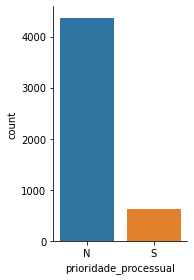

In [ ]:
sns.catplot(x="prioridade_processual", 
            data=df, kind="count",
            height=4, aspect=.7)

A grande maioria dos processo não possuem prioridade. Quais serão os assuntos que recebem prioridade?

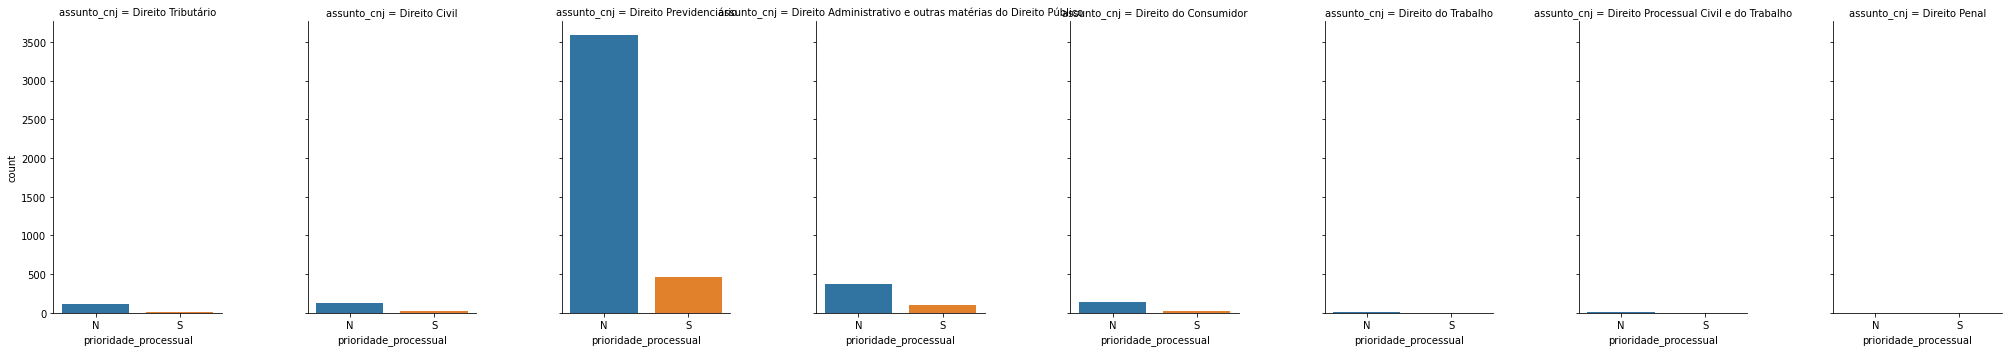

In [ ]:
sns.catplot(x="prioridade_processual", 
            col='assunto_cnj',
            data=df, kind="count",
            height=5, aspect=.7)

Da base fornecida, vemos que o processos que mais recebem prioridade são os de Direito Previdenciário. Visto que a maioria dos processos são desse assunto, é possível que eles recebam mais prioridade para andarem mais rápido, além do fato de que provalvemente as pessoas podem não estar em condições de trabalhar. Além disso, é possível estabeler uma relação com o complemento do assunto, visto que a maioria envolve benefício em espécie, isso pode ocorrer em situações nas quais as pessoas podem estar precisando do pagamento em espécie para poder se sustentar e não estão em condições de trabalhar.

**Conceito**: *RPV* (Requisição de Pequeno Valor) é o ato de começar o processo de liberação do pagamento da dívida pública. (Text adaptado da internet).

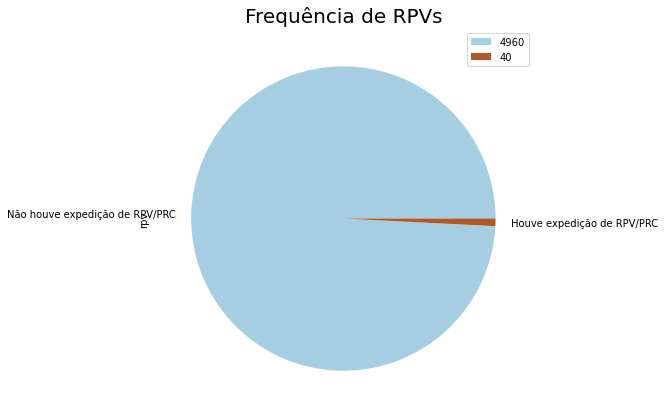

In [ ]:
rpv_values = df['rpv'].value_counts()

fig, ax = plt.subplots(figsize=(12,7))
rpv_values.plot(kind='pie', rot=0, colormap=plt.cm.Paired)

legend = [rpv_values[0], rpv_values[1]]
plt.title('Frequência de RPVs', size=20)
plt.legend(legend)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.tick_params(top="off", left="off", right="off", bottom='off')

Pelo gráfico acima, vemos que na maioria dos procesos não houve a emissão de RPVs, o que pode significar que poucas pessoas conseguem ganhar ações contra o poder público. Quais serão os assuntos que houveram expedições de RPV?

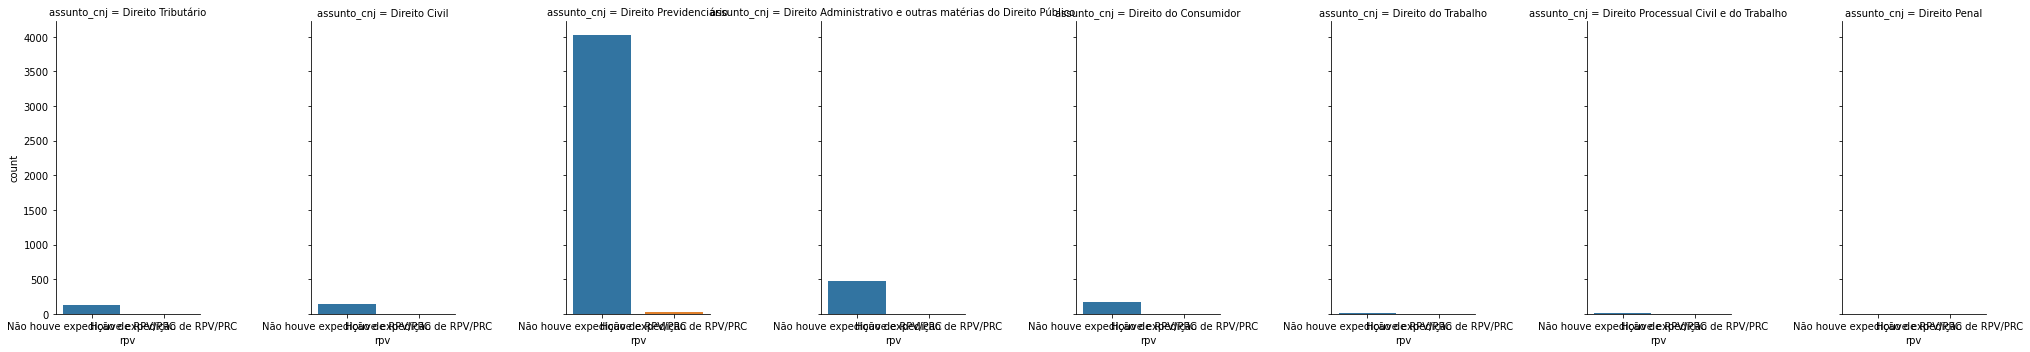

In [ ]:
sns.catplot(x="rpv", 
            col='assunto_cnj',
            data=df, kind="count",
            height=5, aspect=.7)

Com isso, vemos que o único tipo de processo nos quais houveram emissão de RPV foram os de Direito Previdenciário.

**Conceito**: A *distribuição* é ato público de distribuir os processos para os juízes. Essa distribuição pode ser feita de forma dependente ou automática. A forma dependente acontece quando é distribuída por outros juíz, ao passo que a automática é feita de forma eletrônica. (Text adaptado da internet)

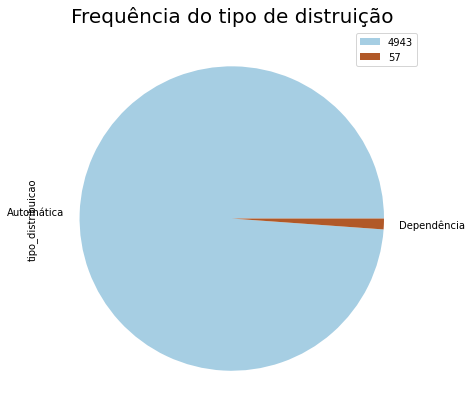

In [ ]:
t_dist = df['tipo_distribuicao'].value_counts()

fig, ax = plt.subplots(figsize=(12,7))
t_dist.plot(kind='pie', rot=0, colormap=plt.cm.Paired)

legend = [t_dist[0], t_dist[1]]
plt.title('Frequência do tipo de distruição', size=20)
plt.legend(legend)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.tick_params(top="off", left="off", right="off", bottom='off')

No gráfico acima, vemos que a maioria das distrubuições dos processos é feita de forma autmática, o que é algo bom, pois pode siginificar que á poucas chances de um juiz atribuir um processo específico para algum outro colega juiz por amizade ou por algum tipo de influência.

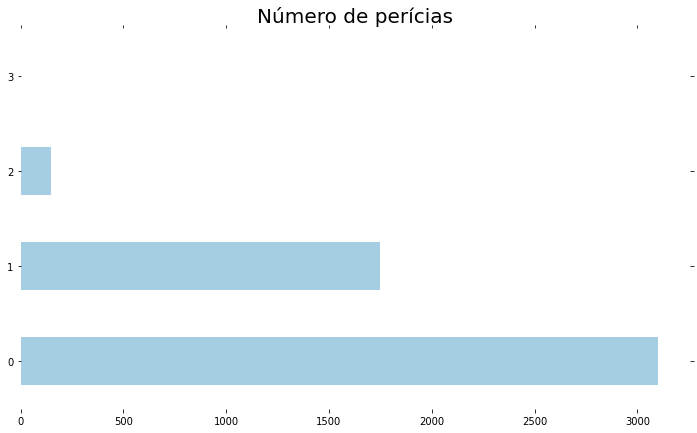

In [ ]:
n_pericias = df['n_pericias_realizadas'].value_counts()

fig, ax = plt.subplots(figsize=(12,7))
n_pericias.plot(kind='barh', rot=0, colormap=plt.cm.Paired)

plt.title('Número de perícias', size=20)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.tick_params(top="off", left="off", right="off", bottom='off')

No gráfico acima, vemos que a maioria dos processos não realizaram perícias, ao passo que raramente se fazem 3 perícias ou mais. O ato de fazer ou não perícias pode estar relacionada a natureza do processo. Quais assuntos processuais realizam mais perícias?

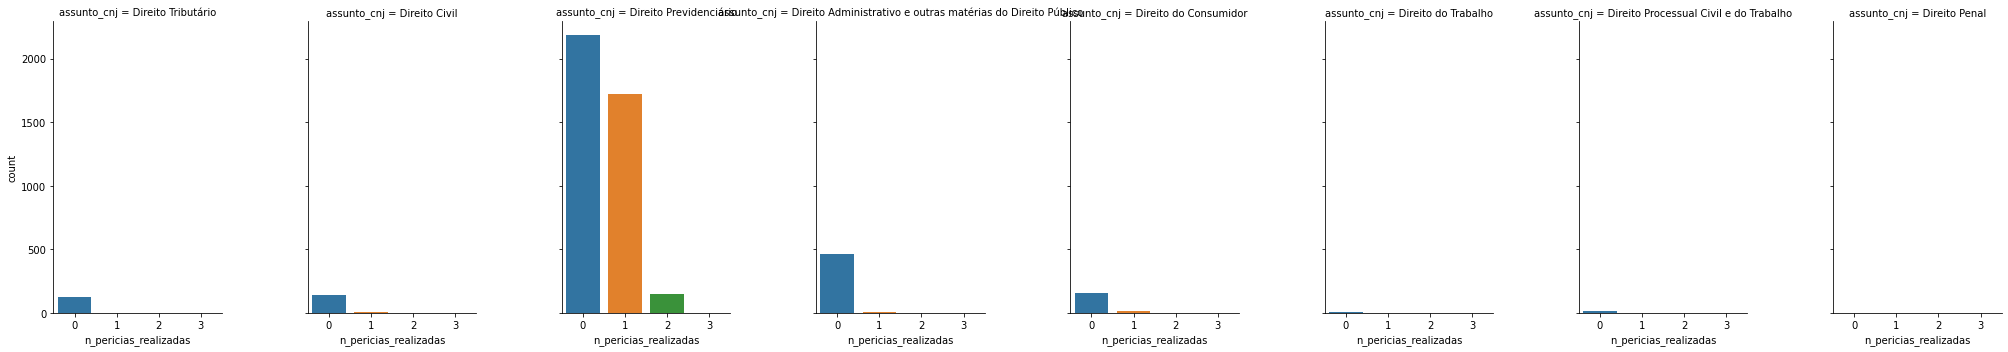

In [ ]:
sns.catplot(x="n_pericias_realizadas", 
            col='assunto_cnj',
            data=df, kind="count",
            height=5, aspect=.7)

Nos gráficos acima, vemos que a maioria das perícias são realizadas nos processos cujo assunto é Direito Previdenciário, visto há uma demanda em saber se, de fato, as pessoas não estão em condições de trabalhar (no caso de perícias médicas), por exemplo.

In [ ]:
df['nome_perito'].value_counts()

SEM PERÍCIA                          3102
RONIVALDO DE OLIVEIRA BARROS           66
ADOLFO VASCONCELOS DE ALBUQUERQUE      46
EUGÊNIO PACELLI CASADO DE SOUZA        39
MARCOS ANTONIO FERNANDES CASEIRA       34
                                     ... 
RAFAEL MIDLEJ BRITO                     1
MARTA GLEIDE DOS SANTOS                 1
JEAN QUERENO DE OLIVEIRA LUNA           1
ROSALVO GOMES DA SILVA JUNIOR           1
RONALD CAVALCANTE DANTAS                1
Name: nome_perito, Length: 484, dtype: int64

**Conceito**: Processo arquivado indica que não há expectativa de prosseguimento do processo. (Texto da internet) 

In [ ]:
df['processo_arquivado'].value_counts()

1.0    3096
0.0     266
Name: processo_arquivado, dtype: int64

#### 1.3.4.4 Colunas 30 a 39

In [ ]:
df.iloc[:, 30:40]

n_movimentacoes  tempo_processual             liminar  \
0                56.0        238.000000  SEM PEDIDO LIMINAR   
1                 NaN               NaN  SEM PEDIDO LIMINAR   
2                 NaN               NaN  SEM PEDIDO LIMINAR   
3                 NaN               NaN          INDEFERIDA   
4               114.0       1065.000000  SEM PEDIDO LIMINAR   
...               ...               ...                 ...   
4995             44.0         25.828125  SEM PEDIDO LIMINAR   
4996              NaN               NaN  SEM PEDIDO LIMINAR   
4997             59.0        459.250000  SEM PEDIDO LIMINAR   
4998             47.0        101.000000  SEM PEDIDO LIMINAR   
4999              NaN               NaN  SEM PEDIDO LIMINAR   

             data_liminar        data_sentenca  \
0                     NaN  2017-05-21 18:23:56   
1                     NaN  2013-10-30 17:10:04   
2                     NaN  2007-12-04 09:35:02   
3     2014-11-16 23:11:00  2014-04-23 19:41:13   
4                     NaN  2018-05-14 12:39:45   
...                   ...                  ...   
4995                  NaN  2017-08-08 12:58:06   
4996                  NaN  2008-06-23 18:09:26   
4997                  NaN  2018-03-06 19:43:45   
4998                  NaN  2018-05-16 07:32:48   
4999                  NaN  2007-09-25 20:12:07   

                     magistrado_sentenca         resultado_1_grau  \
0     ARNALDO PEREIRA DE ANDRADE SEGUNDO               PROCEDENTE   
1               ANDRÉ CARVALHO MONTEIRO       EXTINTO SEM MÉRITO   
2               ANDRÉ CARVALHO MONTEIRO       EXTINTO SEM MÉRITO   
3       ADONIAS RIBEIRO DE CARVALHO NETO               PROCEDENTE   
4                 GUILHERME SOARES DINIZ             IMPROCEDENTE   
...                                  ...                      ...   
4995          GUSTAVO DE MENDONÇA GOMES       EXTINTO SEM MÉRITO   
4996                GUSTAVO MELO BARBOSA             IMPROCEDENTE   
4997    GABRIELA LIMA FONTENELLE CÂMARA  PARCIALMENTE PROCEDENTE   
4998    JANINE DE MEDEIROS SOUZA BEZERRA  PARCIALMENTE PROCEDENTE   
4999              GUSTAVO MOULIN RIBEIRO               PROCEDENTE   

                                      conteudo_sentenca  n_dias_ate_sentenca  \
0     SENTENÇA 1. Relatório Cuida-se de ação propost...            76.307593   
1     SENTENÇA Trata-se de ação especial cível, em c...            20.844491   
2     SENTENÇA Vistos etc. Trata-se de ação especial...           143.822245   
3     SENTENÇA I - RELATÓRIO Cuida-se de ação em que...            21.360567   
4     SENTENÇA Tipo A I – RELATÓRIO Dispensado o rel...           784.066493   
...                                                 ...                  ...   
4995  SENTENÇA Vistos etc. Trata-se de ação especial...             4.861875   
4996  PODER JUDICIÁRIO JUSTIÇA FEDERAL NO CEARÁ 21a ...           368.928773   
4997  JUSTIÇA FEDERAL SEÇÃO JUDICIÁRIA DO ESTADO DO ...           228.432465   
4998   SENTENÇA 1.Relatório Trata-se de ação especia...            64.673472   
4999   SENTENÇA Trata-se de ação proposta contra a C...           113.520220   

      n_tokens_sentenca  
0                  1309  
1                   263  
2                   956  
3                  3037  
4                  2099  
...                 ...  
4995                217  
4996               1278  
4997               2179  
4998               1342  
4999                961  

[5000 rows x 10 columns]

In [ ]:
df['n_movimentacoes'].value_counts()

35.0     91
24.0     87
34.0     85
37.0     82
25.0     82
         ..
129.0     1
254.0     1
118.0     1
152.0     1
111.0     1
Name: n_movimentacoes, Length: 144, dtype: int64

In [ ]:
df['tempo_processual'].describe()

count    3362.000000
mean      247.064456
std       268.830437
min         0.065308
25%        97.515625
50%       169.750000
75%       293.000000
max      3214.000000
Name: tempo_processual, dtype: float64

**Conceito**: O *pedido de liminar* é um pedido que uma das partes de um litígio faz ao Magistrado com o objetivo de adquirir um direito ou realizar uma ação antes que os trâmites comuns aconteçam. Por isso, o pedido tem caráter de urgência, pois a parte que a requer não pode esperar o tempo necessário do processo para que a ação seja realizada. (Texto da internet)

In [ ]:
df['liminar'].value_counts()

SEM PEDIDO LIMINAR       4722
INDEFERIDA                243
DEFERIDA                   34
PARCIALMENTE DEFERIDA       1
Name: liminar, dtype: int64

Há alguma relação entre a coluna `liminar` e `assunto_cnj`?

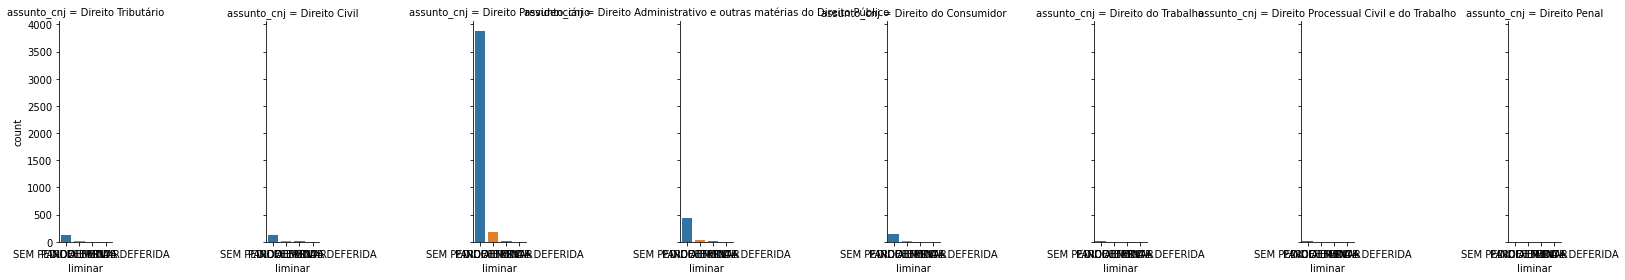

In [ ]:
sns.catplot(x='liminar',
            col='assunto_cnj',
            data=df, kind='count',
            height=4, aspect=.7)

Nos gráficos acima, é possível observar que não houveram pedidos de liminar na maioria dos processos de Direito Previdenciário, além de que a maioria das liminares indeferidas também se encontram nessa categoria de assunto processual.

In [ ]:
res_1_grau = df['resultado_1_grau'].value_counts()
res_1_grau

IMPROCEDENTE               1862
EXTINTO SEM MÉRITO         1415
PROCEDENTE                  949
PARCIALMENTE PROCEDENTE     445
HOMOLOGADA TRANSAÇÃO        329
Name: resultado_1_grau, dtype: int64

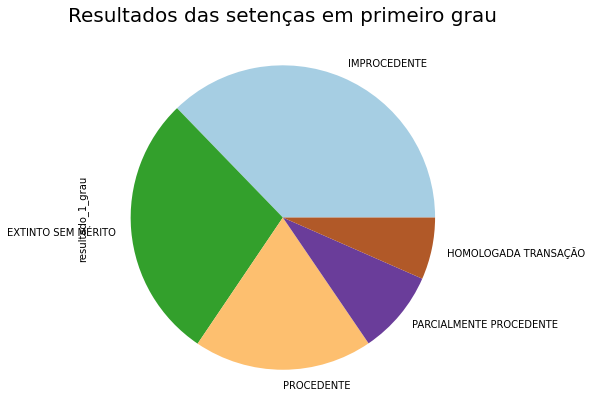

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
res_1_grau.plot(kind='pie', rot=0, colormap=plt.cm.Paired)

plt.title('Resultados das setenças em primeiro grau', size=20)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.tick_params(top="off", left="off", right="off", bottom='off')

Dependendo da modelagem, as colunas `data_liminar` e `data_sentenca` podem ser retiradas na hora do treinamento, pois `n_dias_ate_sentenca` já nos oferece um valor número para essas informações. Além dessas, a coluna `magistrado_sentenca` também não é relevante para o treinamento.

#### 1.3.4.5 Colunas 40 a 45

In [ ]:
df.iloc[:, 40:]

relator_acordao       data_sessao_tr  \
0                           Almiro José da Rocha Lemos  2017-08-09 09:00:00   
1                                                  NaN                  NaN   
2                                                  NaN                  NaN   
3                              CÍNTIA MENEZES BRUNETTA  2014-06-25 13:30:00   
4                                Joaquim Lustosa Filho  2018-06-19 10:00:00   
...                                                ...                  ...   
4995                                               NaN                  NaN   
4996                             JOSÉ VIDAL SILVA NETO  2008-09-08 14:00:00   
4997  DARTANHAN VERCINGETÓRIX DE ARAÚJO E ROCHA (2ªTR)  2018-05-16 13:30:00   
4998                                               NaN                  NaN   
4999                                               NaN                  NaN   

             data_acordao                                   conteudo_acordao  \
0     2017-08-14 10:46:34  PROCESSO 0500454-62.2017.4.05.8402  EMENTA:DIR...   
1                     NaN                                                NaN   
2                     NaN                                                NaN   
3     2014-06-27 16:14:43  VOTO Relatório dispensado, nos termos do art. ...   
4     2018-06-19 15:01:56  EMENTA PREVIDENCIÁRIO. PENSÃO POR MORTE. PROVA...   
...                   ...                                                ...   
4995                  NaN                                                NaN   
4996  2008-09-15 14:53:50  VOTO E ACÓRDÃO Trata-se de recurso interposto ...   
4997  2018-05-22 15:27:32  RELATÓRIO Trata-se de recurso interposto pela ...   
4998                  NaN                                                NaN   
4999                  NaN                                                NaN   

        resultado_2_grau  n_tokens_acordao  
0         NÃO PROVIMENTO             381.0  
1                    NaN               0.1  
2                    NaN               0.1  
3         NÃO PROVIMENTO            1214.0  
4         NÃO PROVIMENTO            1962.0  
...                  ...               ...  
4995                 NaN               0.1  
4996      NÃO PROVIMENTO             707.0  
4997  PROVIMENTO PARCIAL             815.0  
4998                 NaN               0.1  
4999                 NaN               0.1  

[5000 rows x 6 columns]

In [ ]:
res_2_grau = df['resultado_2_grau'].value_counts()
res_2_grau

NÃO PROVIMENTO        1062
PROVIMENTO             208
PROVIMENTO PARCIAL     108
NÃO CONHECIDO           17
NÃO RECEBIDO             4
NEGOU SEGUIMENTO         3
DESISTÊNCIA              1
PREJUDICADO              1
Name: resultado_2_grau, dtype: int64

**Conceitos:**
  - **Não provimento**: Impedir de continuar o processo
  - **Provimento**: Pode continuar o processo
  - **Provimento Parcial**: Os recursos foram aceitos em parte

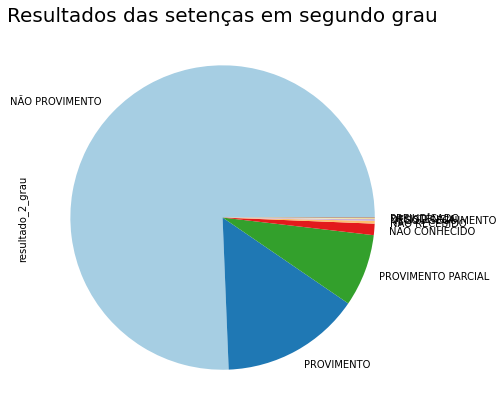

In [ ]:
fig, ax = plt.subplots(figsize=(12,7))
res_2_grau.plot(kind='pie', rot=0, colormap=plt.cm.Paired)

plt.title('Resultados das setenças em segundo grau', size=20)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)
ax.tick_params(top="off", left="off", right="off", bottom='off')

Esta coluna nos mostra que a maioria dos processos foram impedidos de continuar após a segunda instância, sendo resolvidos assim logo na primeira instância.

#### 1.3.4.6 Colunas textuais

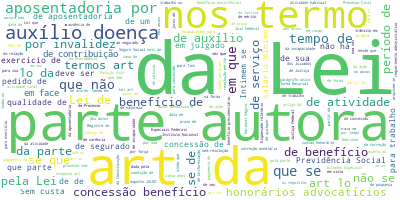

In [ ]:
# Importação da biblioteca
from wordcloud import WordCloud

long_string = ','.join(list(df['conteudo_sentenca'].values))

wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

wordcloud.generate(long_string)

wordcloud.to_image()

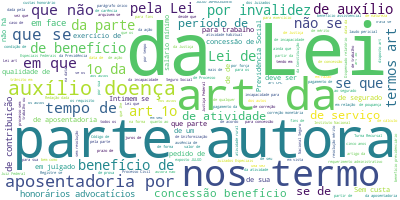

In [ ]:
acordao = df[df['conteudo_acordao'].notnull()]
long_string2 = ','.join(list(acordao['conteudo_acordao'].values))
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
wordcloud.generate(long_string)
wordcloud.to_image()

In [ ]:
run.finish()